In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


In [18]:
df.head()

,Adj Close,Diff,Target,Premium,predictions,Profits
Date,,,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431,-1.0,0.0
1981-01-31,0.097591,-0.006045,-1.0,0.007807,-1.0,0.0
1981-02-28,0.091546,-0.006909,-1.0,0.007324,-1.0,0.0
1981-03-31,0.084637,0.013386,1.0,0.006771,1.0,0.0
1981-04-30,0.098023,0.016409,1.0,0.007842,1.0,0.0


In [4]:
# Difference in stockprice
df['Diff'] = df["Adj Close"].diff().shift(-1)

df['Target'] = np.sign(df['Diff'])

df['Premium'] = .08 * df['Adj Close']

In [5]:
df.head

<bound method NDFrame.head of              Adj Close       Diff  Target    Premium
Date                                                
1980-12-31    0.117887  -0.020296    -1.0   0.009431
1981-01-31    0.097591  -0.006045    -1.0   0.007807
1981-02-28    0.091546  -0.006909    -1.0   0.007324
1981-03-31    0.084637   0.013386     1.0   0.006771
1981-04-30    0.098023   0.016409     1.0   0.007842
...                ...        ...     ...        ...
2023-09-30  170.984741  -0.439423    -1.0  13.678779
2023-10-31  170.545319  19.404678     1.0  13.643625
2023-11-30  189.949997   2.580002     1.0  15.196000
2023-12-31  192.529999  -3.899994    -1.0  15.402400
2024-01-31  188.630005        NaN     NaN  15.090400

[518 rows x 4 columns]>

# 3.) Pull in X data, normalize and build a LogReg on column 2

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [7]:
file_path = r'C:\Users\sulta\OneDrive\Documents\Quarter 2\ECON 441B Applied Data Management for Economists\Xdata.csv'
X = pd.read_csv(file_path, index_col="Date", parse_dates=["Date"])


In [8]:
X.head

<bound method NDFrame.head of                 VAR1
Date                
1980-12-31  0.163261
1981-01-31  0.437449
1981-02-28 -0.334994
1981-03-31  2.550820
1981-04-30  3.170655
...              ...
2023-05-31  2.330573
2023-06-30  3.033257
2023-07-31  1.007072
2023-08-31  0.504651
2023-09-30  0.669328

[514 rows x 1 columns]>

In [9]:
y = df.loc[:"2023-09-30", "Target"].copy()

df = df.loc[:"2023-09-30", :].copy()

In [10]:
logreg = LogisticRegression()

logreg.fit (X, y)

y_pred = logreg.predict(X)

# 4.) Add columns, prediction and profits.

In [16]:
df["predictions"] = y_pred

In [19]:
df["Profits"] = 0.

#True Positives
df.loc[(df["predictions"] == 1) & (df["Target"] == 1), "Profits"] = df.loc[(df["predictions"] == 1) & (df["Target"] == 1), "Premium"]

#False Positives
df.loc[(df["predictions"] == 1) & (df["Target"] == -1), "Profits"] = 100 * df.loc[(df["predictions"] == 1) & (df['Target'] == -1),"Diff"]

# 5.) Plot profits over time

<function matplotlib.pyplot.show(close=None, block=None)>

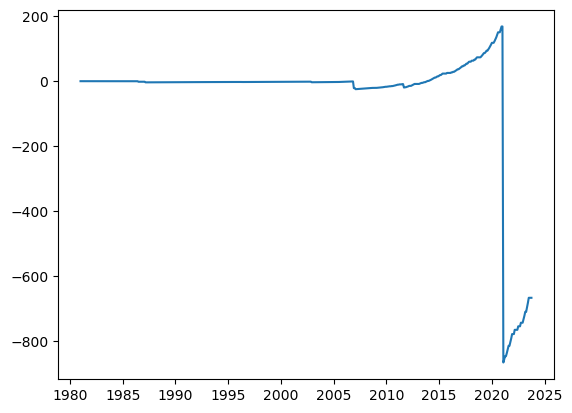

In [20]:
plt.plot(np.cumsum(df["Profits"]))
plt.show